# Task 1: Data Preparation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sn
from pandas.plotting import scatter_matrix

In [2]:
# Load the data from the file NBA_players_stats.csv using pandas library. 
# Using Rank as an index as it not a feature.
file_name = "NBA_players_stats.csv"
df = pd.read_csv(file_name)

In [3]:
# Removing Rank variable
df.drop(columns ="Rk", inplace = True)

In [4]:
# Having a glimpse of the data
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,...,0.543,46,95,141,20,15,19,32,58,212
1,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,...,NaN,0,3,3,2,0,0,0,1,20000
2,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,...,0.443,133,161,294,69,29,20,50,63,265
3,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,...,0.847,72,241,313,179,29,34,98,80,634
4,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,...,0.838,17,77,94,36,8,18,20,36,28800


In [5]:
# Finding the structure of the data
df.shape

(512, 28)

In [6]:
#finding the data types of all the columns
df.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

In [7]:
df.iloc[:,0:16].describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,509.000000,512.000000,512.000000,479.000000,512.000000,512.000000,505.000000
mean,26.025391,22.515625,10.603516,512.730469,87.326172,187.789062,0.439961,27.218750,73.910156,0.316823,60.107422,113.878906,0.501632
std,12.099932,10.762502,12.697945,374.173372,82.210894,170.428063,0.120485,29.654749,75.700355,0.140463,63.802427,116.742818,0.143022
min,-19.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,14.000000,0.000000,147.750000,18.000000,43.000000,0.391000,3.000000,9.000000,0.285500,10.000000,22.000000,0.444000
50%,25.000000,25.000000,3.000000,497.000000,64.500000,145.000000,0.442000,17.000000,50.500000,0.349000,39.000000,75.000000,0.510000
75%,28.000000,33.000000,20.000000,814.250000,131.250000,275.000000,0.500000,45.000000,119.250000,0.394000,88.250000,171.000000,0.575000
max,280.000000,38.000000,37.000000,1358.000000,379.000000,764.000000,1.000000,169.000000,411.000000,1.000000,329.000000,543.000000,1.000000


In [8]:
df.iloc[:,16:29].describe()

,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,512.000000,512.000000,480.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,36.658203,47.070312,0.742929,20.808594,73.439453,94.248047,52.925781,16.050781,10.509766,28.810547,41.898438,333.275391
std,45.406517,56.053013,0.171721,24.399771,66.360902,86.459582,60.983960,13.501952,13.058198,28.076169,31.061290,1550.220911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,0.667000,4.000000,18.750000,23.000000,9.000000,4.000000,2.000000,7.000000,14.000000,50.000000
50%,21.000000,29.000000,0.772000,13.000000,57.500000,73.000000,35.000000,14.000000,6.000000,22.000000,39.500000,180.000000
75%,48.000000,63.250000,0.851000,27.000000,110.000000,140.000000,69.000000,25.000000,14.000000,40.250000,64.000000,356.750000
max,298.000000,363.000000,1.000000,159.000000,357.000000,472.000000,345.000000,63.000000,111.000000,149.000000,228.000000,28800.000000


## Data cleaning

In [9]:
# Check if any entry is repeated or not.
# An entry will be called a duplicate entry when all the values in the rows are same.
df[df.duplicated()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [10]:
# If any duplicates are present, drop them.
df.drop_duplicates(inplace = True)

In [11]:
x = df.isna().sum()
y = df.count()
na_count = np.where((x/y)>0.5,True, False)
col_names = x[na_count].index

df.drop(columns =col_names, inplace = True, axis = 0)

### Task 2.2

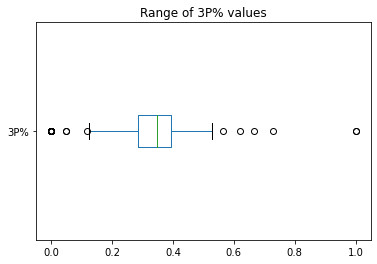

In [12]:
df['3P%'].dropna().plot(kind="box", vert= False)
plt.title("Range of 3P% values")
plt.show()
# This shows that there are no errors in the columns which is outside the range 0 and 1.
# We'll check for data entry errors and NA values.

In [13]:
# checking if 3P is greater than 3PA
df['Errorcount3P?'] = np.where(df['3P'] >df['3PA'], 'True', 'False')
df['Errorcount3P?'].value_counts()
index_val = df[ df['Errorcount3P?'] == 'True'].index
df.drop(index_val, inplace = True)
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,509.000000,512.000000,512.000000,479.000000,...,480.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,26.025391,22.515625,10.603516,512.730469,87.326172,187.789062,0.439961,27.218750,73.910156,0.316823,...,0.742929,20.808594,73.439453,94.248047,52.925781,16.050781,10.509766,28.810547,41.898438,333.275391
std,12.099932,10.762502,12.697945,374.173372,82.210894,170.428063,0.120485,29.654749,75.700355,0.140463,...,0.171721,24.399771,66.360902,86.459582,60.983960,13.501952,13.058198,28.076169,31.061290,1550.220911
min,-19.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,14.000000,0.000000,147.750000,18.000000,43.000000,0.391000,3.000000,9.000000,0.285500,...,0.667000,4.000000,18.750000,23.000000,9.000000,4.000000,2.000000,7.000000,14.000000,50.000000
50%,25.000000,25.000000,3.000000,497.000000,64.500000,145.000000,0.442000,17.000000,50.500000,0.349000,...,0.772000,13.000000,57.500000,73.000000,35.000000,14.000000,6.000000,22.000000,39.500000,180.000000
75%,28.000000,33.000000,20.000000,814.250000,131.250000,275.000000,0.500000,45.000000,119.250000,0.394000,...,0.851000,27.000000,110.000000,140.000000,69.000000,25.000000,14.000000,40.250000,64.000000,356.750000
max,280.000000,38.000000,37.000000,1358.000000,379.000000,764.000000,1.000000,169.000000,411.000000,1.000000,...,1.000000,159.000000,357.000000,472.000000,345.000000,63.000000,111.000000,149.000000,228.000000,28800.000000


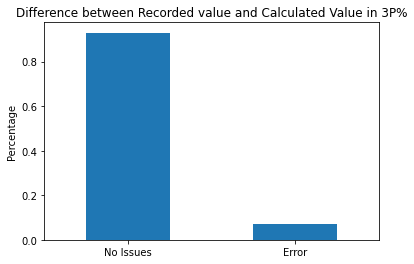

In [14]:
df['3P_per'] = df['3P']/df['3PA']
#Correcting the precision.
df['3P_per'] = df['3P_per'].fillna(0)
df['comparison_column_3P%'] = np.where(abs(df["3P%"] - df["3P_per"])<0.001, "No Issues", "Error")
x =df['comparison_column_3P%'].value_counts()
x = x/df['comparison_column_3P%'].count()
x.plot(kind = "bar", rot = 0, ylabel ="Percentage", title = "Difference between Recorded value and Calculated Value in 3P%")
plt.show()

In [15]:
x =df[['3P%','3P_per']][df['comparison_column_3P%']== "Error"]
x['comparison_column_3P%'] = np.where(x['3P%'].isna(), 1,0 )
x.head(10)

,3P%,3P_per,comparison_column_3P%
0,NaN,0.000000,1
3,0.05,0.333333,0
8,0.05,0.500000,0
9,NaN,0.000000,1
14,NaN,0.000000,1
23,NaN,0.000000,1
25,0.73,0.369565,0
45,NaN,0.000000,1
55,NaN,0.000000,1
60,NaN,0.000000,1


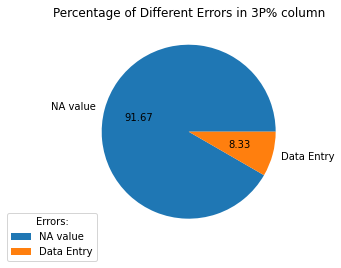

In [16]:
# need to visualize the above errors. First a pie chart with percentage of na errors then
x['comparison_column_3P%'].value_counts().plot(kind='pie',labels= ['NA value','Data Entry'],autopct='%.2f', ylabel= "")
plt.legend(title = "Errors:", bbox_to_anchor=(0.1, 0.15))
plt.title("Percentage of Different Errors in 3P% column")
plt.show()

In [17]:
#Need to remove the errors. We'll be replacing all the values of 3P% with the calculated values
df['3P%'] = df['3P_per']

In [18]:
#Checking if NA values are present in the numerical columns. If present, replace them with 0.
df.select_dtypes(include= np.number).isna().sum()

Age        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        7
FT         0
FTA        0
FT%       32
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
3P_per     0
dtype: int64

In [19]:
num_col = df.select_dtypes(include=['number']).columns
df[num_col]= df[num_col].fillna(0)
# All values must be greater than 0.
df[num_col] = abs(df[num_col])

In [20]:
df['Player']= df['Player'].str.strip()
df['Player']=df['Player'].str.upper()

In [21]:
#for checking no.of teams
df['Tm'].value_counts().count()

55

In [22]:
# The are supposed to be 31 teams. However the dataset 55 teams. 
#We can try to eliminate the inconsistencises with trimming the spaces and converting to upper
#Since none of the teams have numbers in their abbrevations. We can replace 0 with 'O'.
df['Tm']= df['Tm'].str.strip()
df['Tm']=df['Tm'].str.upper()
df['Tm'] = df['Tm'].str.replace('0','O')

In [23]:
# Checking the the team count should be 31
df['Tm'].value_counts().count()

31

In [24]:
# Checking if teams mentioned in the instructions are present, else drop observations
team_list = ["ATL","BOS","BRK","CHA","CHI","CHO","CLE","DAL","DEN","DET","GSW","HOU","IND","LAC","LAL","MEM","MIA","MIL","MIN","NOP","NYK","OKC","ORL","PHI","PHO","POR","SAC","SAS","TOR","TOT","UTA","WAS"]
df['team_present'] = np.where(df['Tm'].isin(team_list), 'True', 'False')
df['team_present'].value_counts()
index_val = df[ df['team_present'] == 'False'].index
df.drop(index_val, inplace = True)

In [25]:
# To cross-check the all the values are same as expected
df['Tm'].value_counts()

BRK    23
HOU    19
WAS    19
SAC    18
CLE    18
DET    18
NYK    18
ORL    18
LAL    17
PHI    17
CHI    17
DAL    17
DEN    17
TOR    17
IND    17
BOS    16
SAS    16
UTA    16
MIN    16
ATL    16
PHO    16
MIA    16
OKC    16
MEM    16
GSW    15
LAC    15
NOP    15
MIL    15
POR    14
CHO    14
TOT    10
Name: Tm, dtype: int64

In [26]:
# positions played
df['Pos'].value_counts()

SG        117
PF        102
C          98
PG         92
SF         83
SG          3
 PG         3
C           2
 SG         1
sg          1
SF-PF       1
Sf          1
PF          1
SGa         1
PG-SG       1
PFa         1
pg          1
Pg          1
 SF         1
SF.         1
Name: Pos, dtype: int64

In [27]:
# There should be only 7 positions. However we have 20.
# There error which can be cleaned.
df['Pos']= df['Pos'].str.strip()
df['Pos']= df['Pos'].str.upper()
df['Pos'].value_counts().count()

10

In [28]:
# After further observation, it is found that there are observations with 'A' and '.' appended at the right.
# Those observations can be cleaned as there no expected observations with those characters.
df['Pos'] = df['Pos'].str.rstrip('A.')
df['Pos'].value_counts()

SG       123
PF       104
C        100
PG        97
SF        86
SF-PF      1
PG-SG      1
Name: Pos, dtype: int64

In [29]:
# Checking if Positions mentioned in the instructions are present, else drop observations
position_list = ["PF", "PG", "C", "SG","SF", "PG-SG","SF-PG"]
df['position_present'] = np.where(df['Pos'].isin(position_list), 'True', 'False')
df['position_present'].value_counts()
index_val = df[ df['position_present'] == 'False'].index
df.drop(index_val, inplace = True)

In [30]:
df['Age'].sort_values(ascending = True).head(5)

397    19.0
26     19.0
497    19.0
287    19.0
197    19.0
Name: Age, dtype: float64

In [31]:
df['Age'].sort_values(ascending = False).head(5)

162    280.0
221     37.0
16      36.0
156     36.0
231     36.0
Name: Age, dtype: float64

In [32]:
# There 2 obervations with the errors for the variable 'Age' . One with the value of -19 and another of 280.
#After some analysis, it was found out both of them are data entry errors. The extra 0 and '-' are data entry errors
# we can rectify that observation.
df['Age'] = df['Age'].replace([280],28)

In [33]:
df['Age'].clip(lower =df['Age'].quantile(0.01).round(), upper = df['Age'].quantile(0.99).round(), inplace = True )

In [34]:
df['G'].clip(lower =0, upper = 82, inplace = True )

In [35]:
df['GS'].clip(lower =0, upper = 82, inplace = True )

In [36]:
# We'll check if there are any values of Games started are more than games played. As that shouldn't be possible
df['ErrorcountGS'] = np.where(df['G'] >=df['GS'], 'True', 'False')
#df['ErrorcountGS'].value_counts()
index_val=df[df['ErrorcountGS']== 'False'].index
df.drop(index_val, inplace = True)

In [37]:
df['MP'].clip(lower =0, upper = 3936, inplace = True )

In [38]:
# Checking if FT,3P or 2P is greater than 2000
# if yes replace that value with np.nan
# after that check if FG is greater than 2000
df['PTS'] = np.where(df["PTS"]<=2000,df["PTS"], np.nan)
df['3P'] = np.where(df["3P"]<=2000,df["3P"], np.nan)
df['2P'] = np.where(df["2P"]<=2000,df["2P"], np.nan)
df['FT'] = np.where(df["FT"]<=2000,df["FT"], np.nan)
df['FG'] = np.where(df["FG"]<=2000,df["FG"], np.nan)
# replace with mean value 
df['PTS'].fillna((df['PTS'].mean()), inplace=True)
df['3P'].fillna((df['3P'].mean()), inplace=True)
df['2P'].fillna((df['2P'].mean()), inplace=True)
df['FT'].fillna((df['FT'].mean()), inplace=True)
df['FG'].fillna((df['FG'].mean()), inplace=True)


In [39]:
#checking if FG is equal to 2 point and 3 pointers
FG_sum = df['2P']+ df['3P']

df['FG_sum'] = FG_sum
df['comparison_column_FG'] = np.where(df["FG"] == df["FG_sum"], True, False)
df['comparison_column_FG'].value_counts()

#Replacing with actual calcuated values
df['FG'] =df['FG_sum']

In [40]:
#checking if FGA is equal to 2 point and 3 pointers attempts
FGA_sum = df['2PA']+ df['3PA']

df['FGA_sum'] = FGA_sum
df['comparison_column_FGA'] = np.where(df["FGA"] == df["FGA_sum"], True, False)
df['comparison_column_FGA'].value_counts()

df['FGA'] = df['FGA_sum']

In [41]:
df['ErrorcountFGA?'] = np.where(df['FG'] >df['FGA'], 'True', 'False')
df['ErrorcountFGA?'].value_counts()

index_val=df[df['ErrorcountFGA?']== 'True']
index_val=df[df['ErrorcountFGA?']== 'True'].index

df.drop(index_val, inplace = True)

In [42]:
df['FG_cal'] = df['FG']/df['FGA']
df['FG_cal'].fillna(0, inplace = True)
df['FG%'] = df['FG_cal']

In [43]:
df['2P_per'] = df['2P']/df['2PA']
df['2P_per'].fillna(0, inplace = True)


df['comparison_column_2P%'] = np.where(abs(df["2P%"] - df["2P_per"])<0.001, True, False)
df['comparison_column_2P%'].value_counts()
df['2P%'] = df['2P_per']

In [44]:
df['Errorcount2PA?'] = np.where(df['2P'] >df['2PA'], 'True', 'False')
df['Errorcount2PA?'].value_counts()

index_val=df[df['Errorcount2PA?']== 'True'].index

df.drop(index_val, inplace = True)

In [45]:
df['FT_per'] = df['FT']/df['FTA']
df['FT_per'].fillna(0,inplace = True)

df['comparison_column_FT%'] = np.where(abs(df["FT%"] - df["FT_per"])<0.001, True, False)
df['comparison_column_FT%'].value_counts()
df['FT%'] = df['FT_per']

In [46]:
df['ErrorcountFTA?'] = np.where(df['FT'] >df['FTA'], 'True', 'False')
df['ErrorcountFTA?'].value_counts()

index_val=df[df['ErrorcountFTA?']== 'True'].index

df.drop(index_val, inplace = True)

In [47]:
df['total_rebounds'] = df['ORB']+df['DRB']
df['comparison_column_TRB'] = np.where(df["TRB"] == df["total_rebounds"], True, False)
df['comparison_column_TRB'].value_counts()

df['TRB'] = df['total_rebounds']

In [48]:
df['PF_max'] = df['G']*6
df['PF'] = np.where(df["PF_max"]>= df["PF"], df["PF"], df["PF_max"])

In [49]:
df['PTS'].sort_values(ascending = False).head()

38     1053.0
110    1039.0
13     1015.0
277    1013.0
240     977.0
Name: PTS, dtype: float64

In [50]:
df['total_PTS'] = (df['3P']*3)+(df['2P']*2) +df['FT']
df['comparison_column_PTS'] = np.where(df["PTS"] == df["total_PTS"], True, False)
df['comparison_column_PTS'].value_counts()


True     509
False      2
Name: comparison_column_PTS, dtype: int64

In [51]:
df[['PTS','total_PTS','comparison_column_PTS']][df['comparison_column_PTS']== False]

,PTS,total_PTS,comparison_column_PTS
1,239.333988,2.0,False
4,239.333988,288.0,False


In [52]:
df['PTS'] = df['total_PTS']


In [53]:
#df[['Player','2P','3P','FT','PTS']].groupby("Player").sum().sort_values(by = 'PTS', ascending = False).head(5)
df.groupby("Player").sum().sort_values(by = 'PTS', ascending = False)

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FG_cal,2P_per,comparison_column_2P%,FT_per,comparison_column_FT%,total_rebounds,comparison_column_TRB,PF_max,total_PTS,comparison_column_PTS
Player,,,,,,,,,,,,,,,,,,,,,
JAMES HARDEN,93.0,62.0,62.0,2346.0,500.0,1034.0,1.425386,202.0,504.0,1.170238,...,1.425386,1.682176,3,2.592161,3,484.0,3,372.0,1568.0,3
BRADLEY BEAL,27.0,32.0,32.0,1143.0,368.0,764.0,0.481675,74.0,221.0,0.334842,...,0.481675,0.541436,1,0.903346,1,174.0,1,192.0,1053.0,1
STEPHEN CURRY,32.0,35.0,35.0,1194.0,343.0,718.0,0.477716,169.0,411.0,0.411192,...,0.477716,0.566775,1,0.934010,1,191.0,1,210.0,1039.0,1
GIANNIS ANTETOKOUNMPO,26.0,35.0,35.0,1189.0,368.0,661.0,0.556732,39.0,137.0,0.284672,...,0.556732,0.627863,1,0.661157,1,408.0,1,210.0,1015.0,1
DAMIAN LILLARD,30.0,34.0,34.0,1224.0,315.0,708.0,0.444915,146.0,380.0,0.384211,...,0.444915,0.515244,1,0.933071,1,145.0,1,204.0,1013.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JALEN HARRIS,22.0,2.0,0.0,4.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,1,0.000000,1,1.0,1,12.0,0.0,1
TY-SHON ALEXANDER,22.0,3.0,0.0,8.0,0.0,3.0,0.000000,0.0,1.0,0.000000,...,0.000000,0.000000,1,0.000000,1,1.0,1,18.0,0.0,1
GREG WHITTINGTON,27.0,2.0,0.0,8.0,0.0,2.0,0.000000,0.0,2.0,0.000000,...,0.000000,0.000000,1,0.000000,1,0.0,1,12.0,0.0,1


In [54]:
df.drop(columns =["ErrorcountGS", "ErrorcountFGA?","ErrorcountFTA?","Errorcount2PA?", "comparison_column_FG", "FG_sum", "FGA_sum", "comparison_column_FGA",  "Errorcount3P?", "3P_per", "comparison_column_3P%", "2P_per","team_present","position_present","FG_cal", "comparison_column_2P%", "FT_per", "comparison_column_FT%","total_rebounds", "comparison_column_TRB", "PF_max",  "total_PTS", "comparison_column_PTS"], inplace = True)
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PRECIOUS ACHIUWA,PF,21.0,MIA,35.0,2.0,491.0,84.0,145.0,0.579310,...,0.543210,46.0,95.0,141.0,20.0,15.0,19.0,32.0,58.0,212.0
1,JAYLEN ADAMS,PG,24.0,MIL,7.0,0.0,18.0,1.0,8.0,0.125000,...,0.000000,0.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,2.0
2,STEVEN ADAMS,C,27.0,NOP,33.0,33.0,918.0,115.0,187.0,0.614973,...,0.443038,133.0,161.0,294.0,69.0,29.0,20.0,50.0,63.0,265.0
3,BAM ADEBAYO,C,23.0,MIA,33.0,33.0,1119.0,236.0,419.0,0.563246,...,0.846561,72.0,241.0,313.0,179.0,29.0,34.0,98.0,80.0,634.0
4,LAMARCUS ALDRIDGE,C,35.0,SAS,21.0,18.0,544.0,115.0,248.0,0.463710,...,0.837838,17.0,77.0,94.0,36.0,8.0,18.0,20.0,36.0,288.0


In [55]:
# storing the cleaned dataset into a csv file
df.to_csv('cleaned_NBA_players_stats.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

In [56]:
file_name = "cleaned_NBA_players_stats.csv"
df1 = pd.read_csv(file_name)
df1.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PRECIOUS ACHIUWA,PF,21.0,MIA,35.0,2.0,491.0,84.0,145.0,0.579310,...,0.543210,46.0,95.0,141.0,20.0,15.0,19.0,32.0,58.0,212.0
1,JAYLEN ADAMS,PG,24.0,MIL,7.0,0.0,18.0,1.0,8.0,0.125000,...,0.000000,0.0,3.0,3.0,2.0,0.0,0.0,0.0,1.0,2.0
2,STEVEN ADAMS,C,27.0,NOP,33.0,33.0,918.0,115.0,187.0,0.614973,...,0.443038,133.0,161.0,294.0,69.0,29.0,20.0,50.0,63.0,265.0
3,BAM ADEBAYO,C,23.0,MIA,33.0,33.0,1119.0,236.0,419.0,0.563246,...,0.846561,72.0,241.0,313.0,179.0,29.0,34.0,98.0,80.0,634.0
4,LAMARCUS ALDRIDGE,C,35.0,SAS,21.0,18.0,544.0,115.0,248.0,0.463710,...,0.837838,17.0,77.0,94.0,36.0,8.0,18.0,20.0,36.0,288.0


In [57]:
# Creating a new Dataframe with top 5 players
top_players = df1[['Player','2P','3P','FT','PTS']].groupby("Player",as_index = False).sum().sort_values(by = 'PTS', ascending = False).head(5)
top_players['2P']= top_players['2P']*2
top_players['3P']= top_players['3P']*3
top_players

,Player,2P,3P,FT,PTS
206,JAMES HARDEN,596.0,606.0,366.0,1568.0
37,BRADLEY BEAL,588.0,222.0,243.0,1053.0
426,STEPHEN CURRY,348.0,507.0,184.0,1039.0
164,GIANNIS ANTETOKOUNMPO,658.0,117.0,240.0,1015.0
83,DAMIAN LILLARD,338.0,438.0,237.0,1013.0


In [58]:
top_players.describe()

,2P,3P,FT,PTS
count,5.000000,5.00000,5.000000,5.000000
mean,505.600000,378.00000,254.000000,1137.600000
std,150.926472,202.90515,67.175144,241.184162
min,338.000000,117.00000,184.000000,1013.000000
25%,348.000000,222.00000,237.000000,1015.000000
50%,588.000000,438.00000,240.000000,1039.000000
75%,596.000000,507.00000,243.000000,1053.000000
max,658.000000,606.00000,366.000000,1568.000000


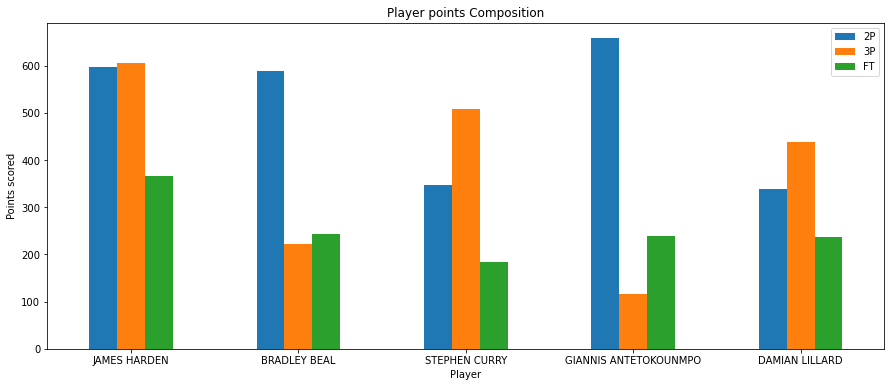

In [59]:
top_players.iloc[:,:-1].plot(x = "Player",kind = "bar", alpha = 1, rot = 0, figsize = (15,6), ylabel = "Points scored", title = "Player points Composition")
plt.show()

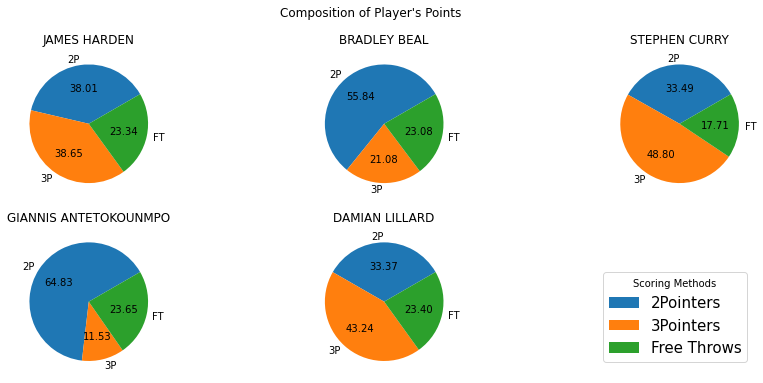

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
top_players1 = top_players.iloc[:,1:-1]
for i, (idx, row) in enumerate(top_players1.set_index(top_players['Player']).iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%.2f')
    ax.set_title(idx)
fig.delaxes(axes[1][2])
labels = ["2Pointers","3Pointers", "Free Throws"]
plt.legend(title = "Scoring Methods", bbox_to_anchor=(3, 0.75), fontsize = 15,labels = labels )
plt.suptitle("Composition of Player's Points")
plt.show()

## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


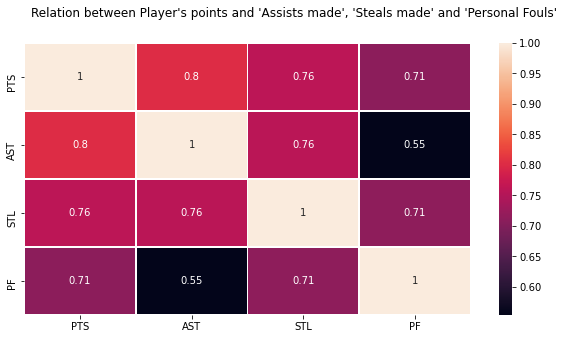

In [61]:
player_stats = df[['PTS','AST','STL', 'PF']]
mat =player_stats.corr()
plt.subplots(figsize=(10, 5))
sn.heatmap(mat, annot=True, linewidths = 0.5, label ="hellp")
plt.suptitle("Relation between Player's points and 'Assists made', 'Steals made' and 'Personal Fouls'")
plt.show()

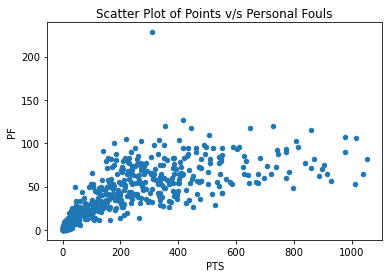

In [62]:
df1.plot(kind ='scatter', x = 'PTS',y = 'PF', title ="Scatter Plot of Points v/s Personal Fouls")
plt.show()

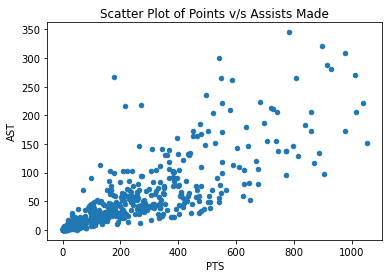

In [63]:
df1.plot(kind ='scatter', x = 'PTS',y = 'AST', title ="Scatter Plot of Points v/s Assists Made")
plt.show()

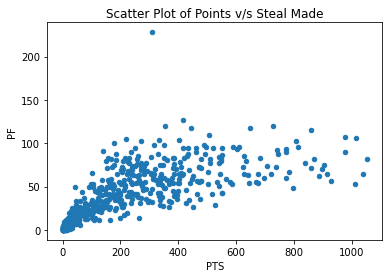

In [64]:
df1.plot(kind ='scatter', x = 'PTS',y = 'PF', title ="Scatter Plot of Points v/s Steal Made")
plt.show()

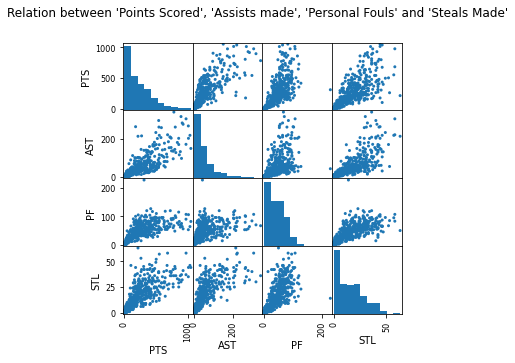

In [65]:
# To have all the scatterplots in a single frame, we'll use ScatterMatrix
scatter_matrix(df1[['PTS','AST', 'PF', 'STL' ]], alpha=1, figsize=(5,5),  diagonal='hist')
plt.suptitle("Relation between 'Points Scored', 'Assists made', 'Personal Fouls' and 'Steals Made'")
plt.show()